In [1]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder # change labels y to values 
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

## Use cross validation set
- create a bunch of training/test splits, calculate the accuracy for each, and average the results

## Steps of CV
1. Split dataset into K equal folds
2. Use fold 1 as testing set, the rest as training set 
3. calculate testing accuracy
4. repeat 2 and 3 K times
5. calculate the average testing accuracy for K times
6. usually we choose K = 10

## Use CV for parameter tuning
### Goal: select the best tuning parameters (hyper parameter) for KNN(iris)

In [2]:
df=pd.read_csv('iris.csv')
X = df.drop(columns='variety').values  #df->np.array
y = df['variety']
y= LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

In [3]:
df.shape

(150, 5)

In [8]:
#10-fold cv with k=5
knnCV = KNeighborsClassifier(n_neighbors=5)
scoresCV = cross_val_score(knnCV,X,y,cv=10,scoring='accuracy')
print(scoresCV)
print(scoresCV.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


In [9]:
#find the best k for KNN with 10-fold cv
kRangeCV=range(1,31)
scoresCV=[]
for k in kRangeCV:
    knnCV=KNeighborsClassifier(n_neighbors=k)
    scoreCV=cross_val_score(knnCV,X,y,cv=10,scoring='accuracy')
    scoresCV.append(scoreCV.mean())
print(scoresCV)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'CV accuracy')

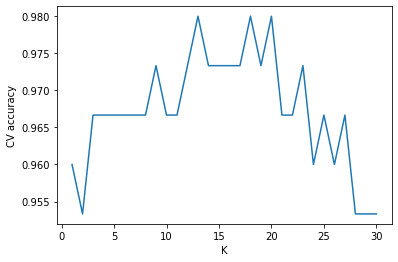

In [10]:
plt.plot(kRangeCV,scoresCV)
plt.xlabel('K')
plt.ylabel('CV accuracy')

In [11]:
# we choose k = 20 for KNN

## Use CV to select model
### Goal: compare the best KNN model with logistic regression with iris dataset

In [13]:
knnVS = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knnVS,X,y,cv=10,scoring='accuracy').mean())

0.9800000000000001


In [14]:
logreg = LogisticRegression(solver='liblinear',multi_class='ovr')
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

0.9533333333333334


## Use CV to select feature
### Goal: select whether the Newspaper feature sould be included in the linear regression model on the advertising dataset

In [22]:
data = pd.read_csv('Advertising.csv',index_col=0)
data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
# model 1
X = data[['TV','Radio','Newspaper']]
y = data.Sales

In [27]:
lineReg = LinearRegression()
scores = cross_val_score(lineReg,X,y,cv=10,scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [28]:
mseScores=-scores  ##mean squared error, the smaller the better
print(mseScores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [30]:
rmseScores=np.sqrt(mseScores)  ## Root Mean Squard Error, the smaller the better
print(rmseScores)
print(rmseScores.mean())

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]
1.6913531708051792


In [32]:
# model 2
X = data[['TV','Radio']]
print(np.sqrt(-cross_val_score(lineReg,X,y,cv=10,scoring='neg_mean_squared_error')).mean())

1.6796748419090766


In [ ]:
# model 2 is better, cuz it has smaller error

## Improvements to CV
### Repeated CV
+ Repeat CV many times and average the results
+ More reliable estimate of out-of-sample performance by reducing the variance associated with a single trial of CV

### Creating a hold-out set
+ "Hold-out" a portion of the data before beginning the model building process
+ Locate the best model using CV on the remaining data, and test it using the hold-out set
+ More reliabale estimate of out-of-sample performance since hold-out set is truely out-of-sample

### Feature engineering and selection with CV iterations
+ Usually, feature engineering and selection occurs before CV
+ Instead, perform all feature engineering and selection within each CV iteration
+ More reliable estimate or out-of-sample performance since it better mimics the application of the model to out-of-sample data